# 자전거 대여 수요 예측

- `datetime`: 날자
- `season`: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
- `holiday`: 1 = 주말을 제외한 공휴일, 0 = 휴일이 아닌 날
- `workingday`: 1 = 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일
- `weather`: 1 = 맑음/약간 흐림, 2 = 안개/안개+흐림, 3 = 가벼운 눈/가벼운 비+천둥, 4 = 심한 눈/비, 천둥/번개
- `temp`: 온도(섭씨)
- `atemp`: 체감온도(섭씨)
- `humidity`: 상대습도
- `windspeed`: 풍속
- `casual`: 등록되지 않은 사용자가 대여한 횟수
- `registered`: 등록된 사용자가 대여한 횟수
- `count`: 대여 횟수

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bike_df = pd.read_csv('/jupyter/Data/bike-sharing-demand/train.csv')
print('DataFrame shape: ',bike_df.shape)
bike_df.head()

DataFrame shape:  (10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [21]:
sns.set_palette(sns.hls_palette(10, h=0.5))

## Datetime

In [5]:
# 문자열을 datetime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일 시간을 추출
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [6]:
# 불필요한 column을 drop
bike_df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)

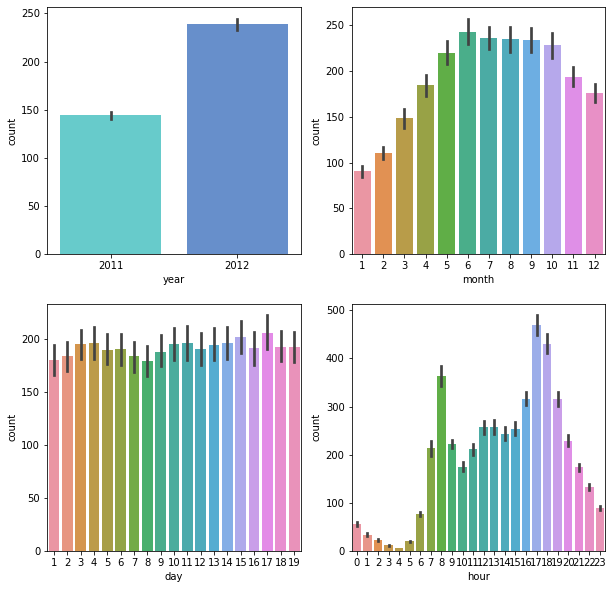

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
sns.barplot(x='year', y='count', data=bike_df, ax=ax[0,0])
sns.barplot(x='month', y='count', data=bike_df, ax=ax[0,1])
sns.barplot(x='day', y='count', data=bike_df, ax=ax[1,0])
sns.barplot(x='hour', y='count', data=bike_df, ax=ax[1,1])
plt.show()

## Season

- `season`: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울

In [23]:
bike_df[bike_df['season'] == 1]['month'].unique()
bike_df[bike_df['season'] == 2]['month'].unique()
bike_df[bike_df['season'] == 3]['month'].unique()
bike_df[bike_df['season'] == 4]['month'].unique()

array([ 1,  2, 12], dtype=int64)

1,2,3월이 봄 4,5,6월이 여름, 7,8,9월이 가을, 10,11,12월이 겨울로 분류되어 있음을 알 수 있다.  
3,4,5월 -> 봄 / 6,7,8월 -> 여름 / 9,10,11 -> 가을 / 12,1,2 -> 겨울로 다시 분류 

In [24]:
def categorize_season(month):
    if month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3
    else:
        return 4

In [25]:
bike_df['season'] = bike_df.month.apply(categorize_season)

In [26]:
bike_df[['season', 'count']].groupby('season').mean()

,count
season,
1,184.074210
2,237.158626
3,218.382644
4,125.753430


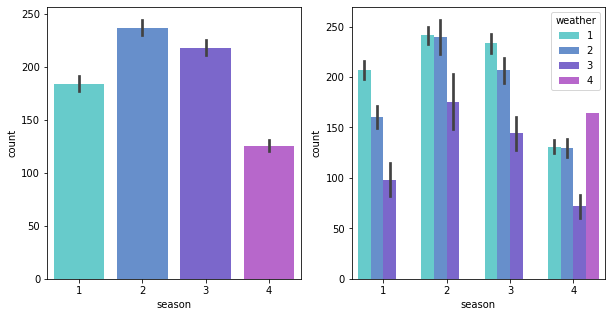

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.barplot(x='season',y='count',data=bike_df, ax=ax[0])
sns.barplot(x='season',y='count',hue='weather',data=bike_df, ax=ax[1])
plt.title('')
plt.show()

**겨울에만 weather이 4(심한 눈/비, 천둥/번개)인 데이터가 집중된 것을 확인 할 수 있다.**

## Holiday
- `holiday`: 1 = 주말을 제외한 공휴일, 0 = 휴일이 아닌 날

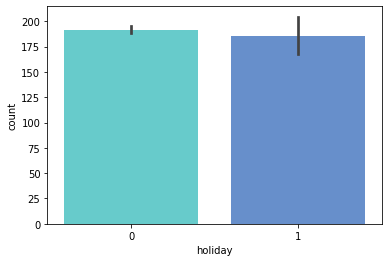

In [28]:
# 휴일 여부와 자전거 대여량
sns.barplot(x='holiday', y='count', data=bike_df)
plt.show()

In [29]:
bike_df[['holiday', 'count']].groupby('holiday').mean()

,count
holiday,
0,191.741655
1,185.877814


## WorkingDay
- `workingday`: 1 = 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일

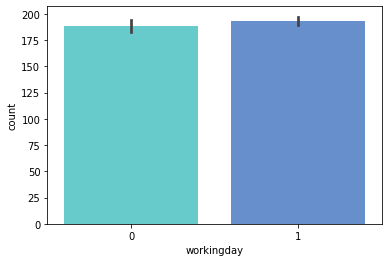

In [30]:
# 근무일 여부와 자전거 대여량
sns.barplot(x='workingday', y='count', data=bike_df)
plt.show()

In [31]:
bike_df[['workingday', 'count']].groupby('workingday').mean()

,count
workingday,
0,188.506621
1,193.011873


## Weather
- `weather`: 1 = 맑음/약간 흐림, 2 = 안개/안개+흐림, 3 = 가벼운 눈/가벼운 비+천둥, 4 = 심한 눈/비, 천둥/번개

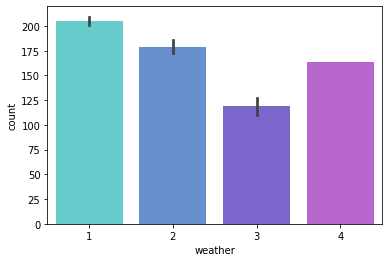

In [32]:
# 날씨와 자전거 대여량
sns.barplot(x='weather',y='count',data=bike_df)
plt.show()

## Temp & Atemp
- `temp`: 온도(섭씨)
- `atemp`: 체감온도(섭씨)

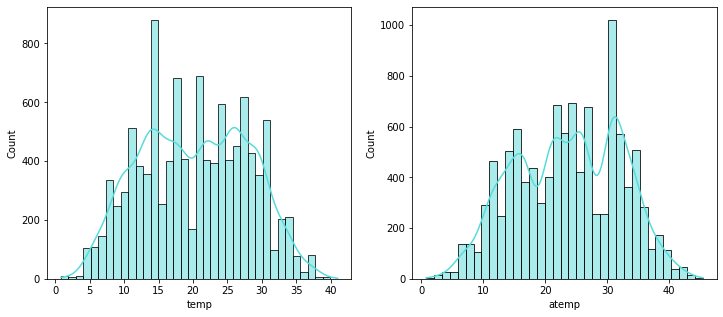

In [33]:
fig, ax = plt.subplots(1, 2,figsize=(12, 5))

# 온도와 자전거 대여량
sns.histplot(bike_df['temp'], kde=True,ax=ax[0])

# 체감온도와 자전거 대여량
sns.histplot(bike_df.atemp, kde=True, ax=ax[1])

plt.show()

## Humidity
- `humidity`: 상대습도

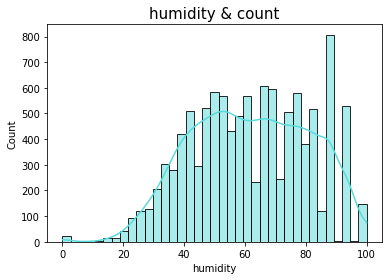

In [34]:
sns.histplot(bike_df['humidity'], kde=True)
plt.title('humidity & count', size=15)
plt.show()

## Windspeed
- `windspeed`: 풍속

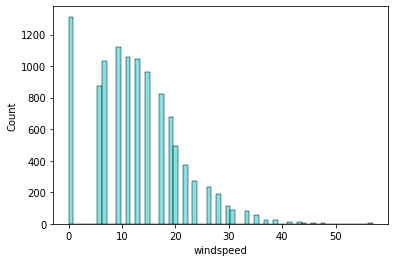

In [39]:
sns.histplot(bike_df['windspeed'])
plt.show()

## Heatmap

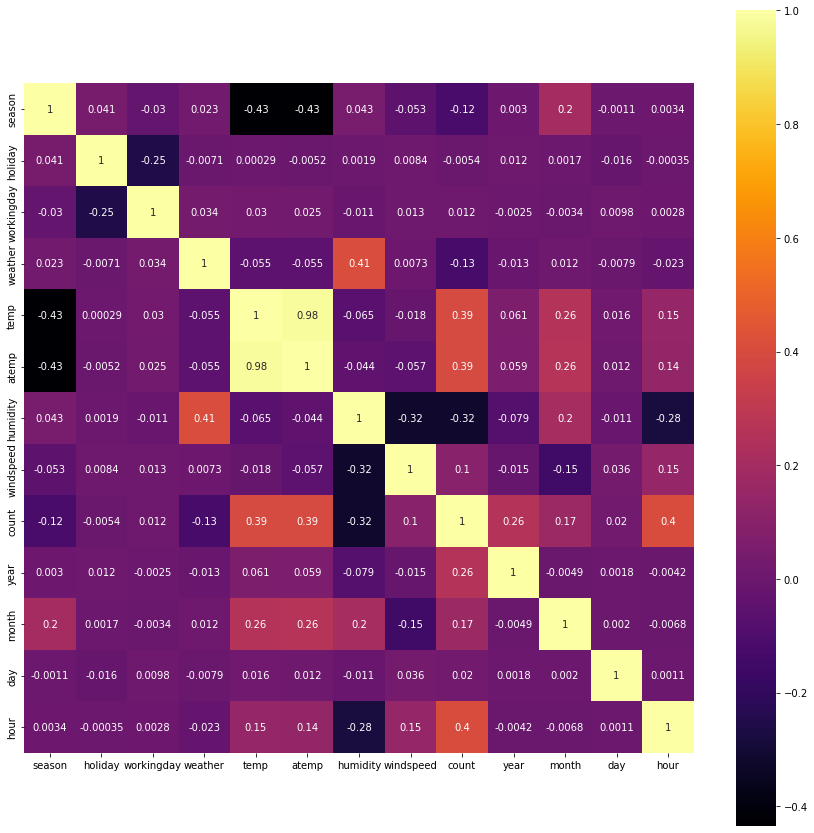

In [68]:
# 상관계수 heatmap 출력
fig = plt.figure(figsize=(15,15))
sns.heatmap(bike_df.corr(), annot=True, square=True, cmap='inferno')
plt.show()

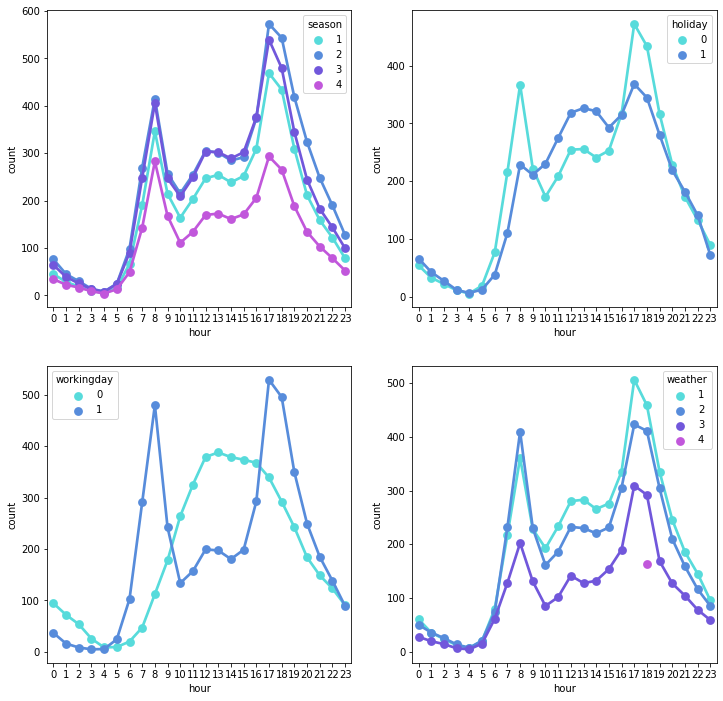

In [66]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
#시간과 계절에 따른 count
sns.pointplot(x='hour',y='count',hue='season',data=bike_df.groupby(['season','hour'])['count'].mean().reset_index(), ax=ax[0,0])

#시간과 휴일 여부에 따른 count
sns.pointplot(x='hour',y='count',hue='holiday',data=bike_df.groupby(['holiday','hour'])['count'].mean().reset_index(), ax=ax[0,1])

#시간과 휴일 여부에 따른 count
sns.pointplot(x='hour',y='count',hue='workingday',data=bike_df.groupby(['workingday','hour'])['count'].mean().reset_index(), ax=ax[1,0])

#시간과 날씨에 따른 count
sns.pointplot(x='hour',y='count',hue='weather',data=bike_df.groupby(['weather','hour'])['count'].mean().reset_index(), ax=ax[1,1])

plt.show()

**weather 값이 4인 데이터에서 이상을 확인**
- 이에 대한 데이터 전처리가 필요해 보인다